In [ ]:
!pip install -q tensorflow==2.1

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 3.9MB 56.7MB/s 
     |████████████████████████████████| 450kB 52.2MB/s 


In [ ]:
import numpy as np
import random

import gym

import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow.keras.models as M

import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)

2.1.0


## Load GYM environment

In [ ]:
env = gym.make('FrozenLake-v0', is_slippery=False)
s = env.reset()

NUM_STATES = env.observation_space.n
NUM_ACTIONS = env.action_space.n

print('States: {}'.format(NUM_STATES))
print('Actions: {}'.format(NUM_ACTIONS))

States: 16
Actions: 4


## Settings

In [ ]:
LR = 0.1
gamma = 0.99

NUM_EPISODES = 2000
MAX_STEPS = 100
REWARD_AVERAGE_WINDOW = 20

## DQN Model

In [ ]:
model = M.Sequential([L.Dense(
    NUM_ACTIONS,
    activation=None,
    use_bias=False,
    kernel_initializer=tf.random_uniform_initializer(0, 0.01))])

def evalQ(s):
     return model(tf.one_hot([s], NUM_STATES)).numpy()[0]

## Prepare model for training

In [ ]:
def loss(q1, q2):
    return tf.reduce_sum(tf.square(q1 - q2))

optimizer = tf.keras.optimizers.SGD(learning_rate=LR)
model.compile(loss=loss, optimizer=optimizer)

pathLenList = []
totalRewardList = []
totalRewardAverageList = []

## DQN training

In [ ]:
for i in range(NUM_EPISODES):
    
    eps = 1./((i/50) + 10)
    
    s = env.reset()
    
    totalReward = 0
    step = 0
    
    while step < MAX_STEPS:
        step += 1

        Q_s = evalQ(s)
        
        if np.random.rand() < eps:
            a = env.action_space.sample()
        else:
            a = np.argmax(Q_s)

        s1, r, done, _ = env.step(a)

        Q_s1 = evalQ(s1)
        
        Q_target = Q_s
        if done:
            Q_target[a] = r
        else:
            Q_target[a] = r + gamma * np.max(Q_s1)
        Q_target = tf.constant(Q_target)[None, ...]

        model.train_on_batch(tf.one_hot([s], NUM_STATES), Q_target)

        totalReward += r
        s = s1
        
        if done:
            break
            
    pathLenList.append(step)
    totalRewardList.append(totalReward)

    if i % REWARD_AVERAGE_WINDOW == 0 and i >= REWARD_AVERAGE_WINDOW:
        totalRewardAverage = np.mean(totalRewardList[-REWARD_AVERAGE_WINDOW:])
        totalRewardAverageList.append(totalRewardAverage)
        if i % 100 == 0:
            print('Episode {}: average total reward = {}'.format(i, totalRewardAverage))

Episode 100: average total reward = 0.8
Episode 200: average total reward = 0.75
Episode 300: average total reward = 0.75
Episode 400: average total reward = 0.8
Episode 500: average total reward = 0.9
Episode 600: average total reward = 1.0
Episode 700: average total reward = 1.0
Episode 800: average total reward = 1.0
Episode 900: average total reward = 1.0
Episode 1000: average total reward = 0.95
Episode 1100: average total reward = 1.0
Episode 1200: average total reward = 1.0
Episode 1300: average total reward = 1.0
Episode 1400: average total reward = 0.95
Episode 1500: average total reward = 0.95
Episode 1600: average total reward = 0.95
Episode 1700: average total reward = 1.0
Episode 1800: average total reward = 1.0
Episode 1900: average total reward = 0.95


## Plot trajectory length over time

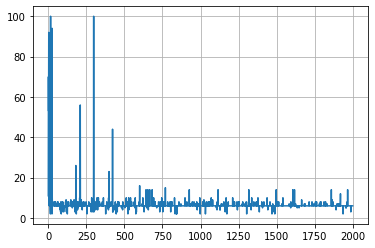

In [ ]:
plt.plot(pathLenList)
plt.grid()

## Plot average total reward over time

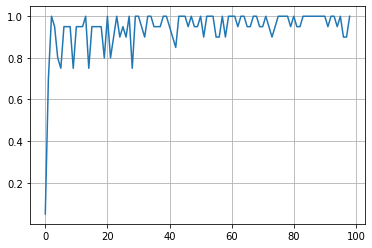

In [ ]:
plt.plot(totalRewardAverageList)
plt.grid()

## Run simulation

In [ ]:
s = env.reset()

for _ in range(1000):
    env.render()
    a = np.argmax(evalQ(s))
    s, r, done, _ = env.step(a)
    if done:
        env.render()
        print('Reward = {}'.format(r))
        break
        
env.close()


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Reward = 1.0
